# Install and Import Library

In [ ]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.32.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [ ]:
import datetime
import json
import datetime
import time
import requests
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
%matplotlib inline

# Data Preparation

## Data Collection

In [ ]:
start_date_str = '2022-01-01'
start_date_dt = datetime.datetime.strptime(start_date_str, '%Y-%m-%d')
start_date = int(start_date_dt.timestamp())

end_date = int(time.time()); # hari ini

YAHOO_FINANCE_URL = f"https://query1.finance.yahoo.com/v8/finance/chart/BBRI.JK?events=capitalGain%7Cdiv%7Csplit&formatted=true&includeAdjustedClose=true&interval=1d&period1={start_date}&period2={end_date}&symbol=BBRI.JK&userYfid=true&lang=en-US&region=US"

def process_stock_data(data):
    try:
        # Navigasi ke struktur data yang diinginkan
        result = data['chart']['result'][0]

        # Ekstrak data timestamp dan ubah menjadi format tanggal
        timestamps = result['timestamp']
        dates = [datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d') for ts in timestamps]

        # Ekstrak data harga dan volume
        quote = result['indicators']['quote'][0]
        opens = quote['open']
        highs = quote['high']
        lows = quote['low']
        closes = quote['close']
        volumes = quote['volume']

        # Ekstrak adjusted close jika tersedia
        if 'adjclose' in result:
            adjcloses = result['adjclose']
        elif 'adjclose' in result['indicators']:
            adjcloses = result['indicators']['adjclose'][0]['adjclose']
        else:
            adjcloses = closes  # Fallback jika tidak ada adjclose

        # Buat DataFrame
        df = pd.DataFrame({
            'Date': dates,
            'Open': opens,
            'High': highs,
            'Low': lows,
            'Close': closes,
            'Volume': volumes,
            'AdjustedClose': adjcloses
        })

        # Simpan ke CSV dengan nama file yang lebih spesifik
        stock_symbol = result['meta']['symbol'] if 'symbol' in result['meta'] else 'BBRI.JK'
        csv_filename = f"{stock_symbol}_data.csv"
        df.to_csv(csv_filename, index=False)
        print(f"Data untuk {stock_symbol} berhasil disimpan ke {csv_filename}")

        # Tampilkan informasi ringkas
        print(f"Total data: {len(df)} records")
        print(f"Rentang waktu: {df['Date'].min()} sampai {df['Date'].max()}")

        # Tampilkan beberapa baris pertama dan terakhir untuk verifikasi
        print("\nBeberapa data awal:")
        display(df.head())

        print("\nBeberapa data akhir:")
        display(df.tail())

        return df

    except KeyError as e:
        print(f"Error: Kunci tidak ditemukan - {e}")
        print("Struktur data JSON mungkin berbeda dari yang diharapkan.")
        # Tampilkan struktur data untuk debugging
        print("Struktur data tingkat atas:", list(data.keys()))
        if 'chart' in data:
            print("Struktur chart:", list(data['chart'].keys()))
            if 'result' in data['chart'] and len(data['chart']['result']) > 0:
                print("Struktur result[0]:", list(data['chart']['result'][0].keys()))
    except Exception as e:
        print(f"Error: {e}")

def get_bbri_stock_data():
    """
    Fungsi khusus untuk mendapatkan data saham BBRI.JK dari Yahoo Finance
    """
    try:
        print(f"Mengambil data saham BBRI.JK dari Yahoo Finance...")

        # Tambahkan user-agent header untuk menghindari penolakan permintaan
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }

        response = requests.get(YAHOO_FINANCE_URL, headers=headers)

        # Periksa status respons
        if response.status_code != 200:
            print(f"Error: Mendapatkan kode status {response.status_code}")
            print(f"Response: {response.text}")
            return None

        # Parse JSON response
        data = response.json()

        # Proses data
        return process_stock_data(data)

    except Exception as e:
        print(f"Error mendapatkan data dari Yahoo Finance API: {e}")
        return None

In [ ]:
# Jalankan fungsi untuk mendapatkan dan memproses data
bbri_data = get_bbri_stock_data()

# Menawarkan opsi untuk mendownload file CSV
try:
    from google.colab import files
    if bbri_data is not None:
        print("Anda dapat mendownload file CSV dengan mengklik link di atas.")
except ImportError:
    print("Tampaknya Anda tidak menjalankan kode di Google Colab.")
    print("File CSV tersimpan di direktori lokal Anda.")

Mengambil data saham BBRI.JK dari Yahoo Finance...
Data untuk BBRI.JK berhasil disimpan ke BBRI.JK_data.csv
Total data: 810 records
Rentang waktu: 2022-01-03 sampai 2025-05-23

Beberapa data awal:


,Date,Open,High,Low,Close,Volume,AdjustedClose
0,2022-01-03,4120.0,4190.0,4090.0,4180.0,90842500,3284.902100
1,2022-01-04,4200.0,4210.0,4160.0,4160.0,93950000,3269.185059
2,2022-01-05,4180.0,4230.0,4130.0,4210.0,174376400,3308.478271
3,2022-01-06,4240.0,4240.0,4140.0,4160.0,137280000,3269.185059
4,2022-01-07,4170.0,4200.0,4150.0,4190.0,101275000,3292.760742



Beberapa data akhir:


,Date,Open,High,Low,Close,Volume,AdjustedClose
805,2025-05-19,4230.0,4260.0,4200.0,4230.0,145935500,4230.0
806,2025-05-20,4230.0,4280.0,4170.0,4210.0,209576900,4210.0
807,2025-05-21,4210.0,4310.0,4210.0,4260.0,256020200,4260.0
808,2025-05-22,4280.0,4310.0,4240.0,4300.0,208291800,4300.0
809,2025-05-23,4350.0,4370.0,4330.0,4350.0,108182800,4350.0


Anda dapat mendownload file CSV dengan mengklik link di atas.


## Data Selection

In [ ]:
file_path = "/content/BBRI.JK_data.csv"

# Load dataset
df = pd.read_csv(file_path, index_col=0)

# Preview
df.head()

,Open,High,Low,Close,Volume,AdjustedClose
Date,,,,,,
2022-01-03,4120.0,4190.0,4090.0,4180.0,90842500,3284.902100
2022-01-04,4200.0,4210.0,4160.0,4160.0,93950000,3269.185059
2022-01-05,4180.0,4230.0,4130.0,4210.0,174376400,3308.478271
2022-01-06,4240.0,4240.0,4140.0,4160.0,137280000,3269.185059
2022-01-07,4170.0,4200.0,4150.0,4190.0,101275000,3292.760742


### Plot Data

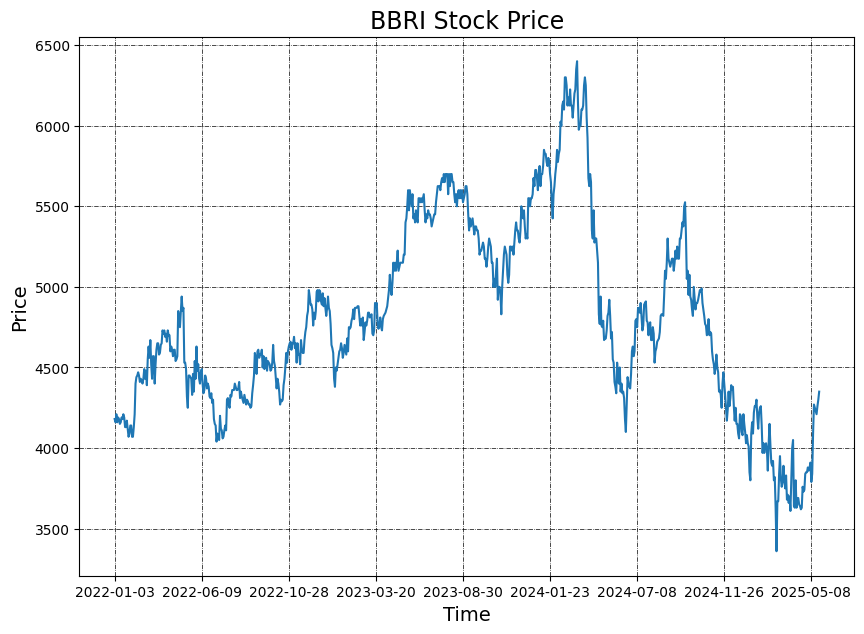

In [ ]:
df['Close'].plot(figsize=(10, 7))
plt.title("BBRI Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

## Data Cleaning

In [ ]:
# Handling missing values (if any)
df.dropna(inplace=True)
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'AdjustedClose'], dtype='object')


In [ ]:
df.head()

,Open,High,Low,Close,Volume,AdjustedClose
Date,,,,,,
2022-01-03,4120.0,4190.0,4090.0,4180.0,90842500,3284.902100
2022-01-04,4200.0,4210.0,4160.0,4160.0,93950000,3269.185059
2022-01-05,4180.0,4230.0,4130.0,4210.0,174376400,3308.478271
2022-01-06,4240.0,4240.0,4140.0,4160.0,137280000,3269.185059
2022-01-07,4170.0,4200.0,4150.0,4190.0,101275000,3292.760742


In [ ]:
# Detect and cap outliers in numerical columns
num_cols = ["Open", "High", "Low", "Close", "Volume", "AdjustedClose"]
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])


In [ ]:
# Save cleaned dataset
cleaned_file_path = "stock_price_cleaned.csv"  # Ganti dengan path untuk menyimpan di Google Colab
df.to_csv(cleaned_file_path, index=False)

In [ ]:
print("Dataset cleaned and saved successfully!")

# Display first few rows of cleaned dataset
df.head()

Dataset cleaned and saved successfully!


,Open,High,Low,Close,Volume,AdjustedClose
Date,,,,,,
2022-01-03,4120.0,4190.0,4090.0,4180.0,90842500.0,3284.902100
2022-01-04,4200.0,4210.0,4160.0,4160.0,93950000.0,3269.185059
2022-01-05,4180.0,4230.0,4130.0,4210.0,174376400.0,3308.478271
2022-01-06,4240.0,4240.0,4140.0,4160.0,137280000.0,3269.185059
2022-01-07,4170.0,4200.0,4150.0,4190.0,101275000.0,3292.760742


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'AdjustedClose'], dtype='object')

## Split Validation data using Walk-Forward Validation

### Load Cleaned Dataset

In [ ]:
# Load cleaned dataset
df = pd.read_csv("stock_price_cleaned.csv")

# Pilih fitur dan target
X = df.drop(columns=["Close"])  # Semua kecuali harga penutupan
y = df["Close"]  # Target yang diprediksi

### Split

In [ ]:
# Walk-Forward Validation
train_size = int(len(X) * 0.8)  # 80% training, 20% testing
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

## Data Transformation

In [ ]:
# Konversi data ke format numpy array
X_train, X_test = np.array(X_train, dtype=np.float32), np.array(X_test, dtype=np.float32)
y_train, y_test = np.array(y_train, dtype=np.float32), np.array(y_test, dtype=np.float32)

# Model

## Build Model using Linier Regression with Least Square Method

In [ ]:
# Membangun model Least Square (Linear Regression)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(X_train.shape[1],))  # Linear Regression
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile Model

In [ ]:
# Compile model
model.compile(optimizer="adam", loss="mse", metrics=["mae", "mape"])

## Model Training

In [ ]:
from tensorflow.keras.callbacks import Callback

class StopOnMAPEThreshold(Callback):
    def __init__(self, threshold=10.0, monitor='mape'):
        super().__init__()
        self.threshold = threshold
        self.monitor = monitor

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        current = logs.get(self.monitor)
        if current is None:
            print(f"[WARNING] Metrik '{self.monitor}' tidak ditemukan di logs.")
            return
        if current < self.threshold:
            print(f"\n✅ MAPE {current:.4f}% sudah < threshold {self.threshold}%. Stop training.")
            self.model.stop_training = True

In [ ]:
# Callback
callbacks = [
    StopOnMAPEThreshold(threshold=10.0),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
]

In [ ]:
# Training model
# model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)
model.fit(
    X_train, y_train,
    epochs=1000,  # cukup besar, nanti diberhentikan otomatis
    batch_size=16,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10388462884618240.0000 - mae: 90107200.0000 - mape: 1873924.0000
Epoch 2/1000


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae,mape
  current = self.get_monitor_value(logs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9325212591980544.0000 - mae: 85466224.0000 - mape: 1777192.5000
Epoch 3/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7680616464121856.0000 - mae: 77507784.0000 - mape: 1597573.6250
Epoch 4/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6539634242748416.0000 - mae: 72615752.0000 - mape: 1506510.1250
Epoch 5/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6100924808298496.0000 - mae: 69041168.0000 - mape: 1425236.2500
Epoch 6/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5085316977262592.0000 - mae: 63830888.0000 - mape: 1324593.6250
Epoch 7/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4328658630082560.0000 - mae: 58262100.0000 - mape: 1205671.8750
Epoch 8/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3415784000847872.0000 - mae: 51300984.0000 - mape: 1057460.1250
Epoch 9/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2774446867742720.0000 - mae: 47181260.0000 - mape: 983644.3750
Epoch 10/1000
41/41 ━━

## Model Evaluation

### MSE (Mean Squared Error)

In [ ]:
# Evaluasi model
loss = model.evaluate(X_test, y_test)
print(f"Model Loss: {loss}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26441.3262 - mae: 130.6327 - mape: 3.0118  
Model Loss: [35938.859375, 152.9055633544922, 3.7405030727386475]


### MAPE (Mean Absolute Percentage Error)

In [ ]:
# Prediksi nilai pada test set
y_pred = model.predict(X_test).flatten()

# Hitung MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Mean Absolute Percentage Error (MAPE): 0.0374


## Model Summary

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20 (84.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14 (60.00 B)

## Save & Convert Model

 ### Save to H5 and Keras

In [ ]:
model.save("stock_price_model.h5")
model.save("stock_price_model.keras")
print("Model h5 and keras saved successfully!")

Model h5 and keras saved successfully!


 ### Export to SavedModel

In [ ]:
model.export("saved_model")

Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 5), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140387545807760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140387586756624: TensorSpec(shape=(), dtype=tf.resource, name=None)


### Convert Saved Model into JSON Format

In [ ]:
!tensorflowjs_converter --input_format=tf_saved_model saved_model tfjs_model

2025-05-24 07:43:26.677137: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748072606.703558    4568 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748072606.710787    4568 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-05-24 07:43:32.949404: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
I0000 00:00:1748072613.021372    4568 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
I0000 00:00

### Archive Model

In [ ]:
# Zip folder tfjs_model untuk diunduh
!zip -r tfjs_model.zip tfjs_model

  adding: tfjs_model/ (stored 0%)
  adding: tfjs_model/group1-shard1of1.bin (stored 0%)
  adding: tfjs_model/model.json (deflated 71%)


# Download Cleaned Dataset, Checkpoint, & tfjs Model

In [ ]:
from google.colab import files

In [ ]:
files.download('/content/BBRI.JK_data.csv')
files.download('/content/stock_price_cleaned.csv')
files.download('/content/stock_price_model.h5')
files.download('/content/stock_price_model.keras')
files.download('/content/tfjs_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>